定义：
    
    输入空间R^n
    输出空间{+1, -1}
    y = sign(wx+b)
    
直观定义:
    
    找到输入空间中的可以分离两类数据的超平面 hyperplane

应用感知机的前提：数据集线性可分 

学习策略: 最小化损失函数
    
    L(w,b) = - sum(y_i(w*x_i+b))
    
    -> 最优化问题 -> SGD

## 学习算法

原始形式：

    min L(w,b) = - sum(y_i(w*x_i+b))
    -> SGD
    -> gradiants : Grad(L(w,b), w) = - sum(y_i*x_i)
                   Grad(L(w,b), b) = - sum(y_i)
    -> SGD : for a random data point (x_i, y_i)
            w <- w + learning_rate*y_i*x_i
            b <- b + learning_rate*y_i

In [1]:
from random import randint
import numpy as np

def basic_perceptron(X, Y, learning_rate):
    # check data 
    X_shape = X.shape
    Y_shape = Y.shape
    
    if X_shape[0] != Y_shape[0] or len(Y_shape) > 1:
        print ("input data X and Y didn't match requirement of Perceptron")
        return
        
    # initialization
    w = np.zeros(X_shape[1])
    b = 0.0
    
    def check(X, Y, w, b):
        for i in range(X.shape[0]):
            if Y[i]*(np.dot(w, X[i])+b) <= 0:
                return False
        return True
    
    if check(X=X, Y=Y, w=w, b=b):
        return (w, b)
    
    while (True):
        index = randint(0, X_shape[0]-1)
        Xi = X[index]
        Yi = Y[index]
        
        if Yi*(np.dot(w, Xi)+b) <= 0:
            w += learning_rate * Yi * Xi
            b += learning_rate * Yi
            
            if check(X=X, Y=Y, w=w, b=b):
                break
        
    return (w,b)

In [19]:
x = np.array([[5,7],[4,10],[-1, -2], [-4, 2]])
y = np.array([1,1,-1, -1])

In [22]:
(w, b) = basic_perceptron(x, y, 0.1)

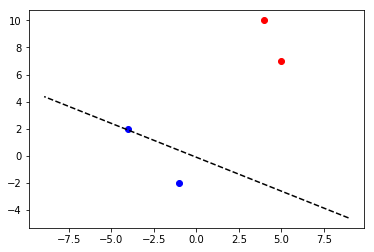

In [23]:
from pylab import norm, plot, show
for i in range(len(x)):
    if y[i] > 0:
        plot(x[i,0], x[i,1], 'ro')
    else:
        plot(x[i,0], x[i,1], 'bo')
#plot.axis([-8, 8, -5, 15])

# plot of the separation line.
# The separation line is orthogonal to w
n = norm(w)
ww = w/n
ww1 = [ww[1],-ww[0]]
ww2 = [-ww[1],ww[0]]
plot([10*ww1[0], 10*ww2[0]],[10*ww1[1]+b, 10*ww2[1]+b],'--k')

show()

In [24]:
w

array([ 0.1,  0.2])

In [25]:
b

-0.10000000000000001

## 对偶dual形式

思路：

    由感知机基本形式可推测：

    w = sum(alpha_i*y_i*x_i) 
    b = sum(alpha_i*y_i) 
    alpha_i = n_i*learning_rate
    n_i : update times of the data point i

输入：X，Y，learning_rate

输出：alpha, b

f(x) = sign(sum( alpha_j \* y_j \* xj \* x )+b)

由于内积形式的存在，我们可以直接用Grammian Matrix计算，配合kernel可以处理非线性

In [26]:
def dual_perceptron(X, Y, learning_rate, kernel=None):
    
    # check data 
    X_shape = X.shape
    Y_shape = Y.shape
    
    if X_shape[0] != Y_shape[0] or len(Y_shape) > 1:
        print ("input data X and Y didn't match requirement of Perceptron")
        return
    
    # initialization
    alpha = np.zeros(X_shape[0])
    b = 0.0
    
    # Grammian
    if kernel == None:
        Gram = np.matmul(x, np.transpose(x))
    
    # check
    def check(X, Y, w, b):
        for i in range(X.shape[0]):
            if Y[i]*(np.dot(alpha, Y*Gram[i])+b) <= 0:
                return False
        return True
    
    if check(X=X, Y=Y, w=w, b=b):
        return (alpha, b)
    
    while (True):
        index = randint(0, X_shape[0]-1)
        Yi = Y[index]
        
        if Yi*(np.dot(alpha, Y*Gram[index])+b) <= 0:
            alpha[index] += learning_rate
            b += learning_rate * Yi
            
            if check(X=X, Y=Y, w=w, b=b):
                break
        print (alpha, b)
        
    return (alpha,b)

In [27]:
x = np.array([[5,7],[4,10],[-1, -2], [-4, 2]])
y = np.array([1,1,-1, -1])
(alpha, b) = dual_perceptron(x, y, 0.1)

In [28]:
w = 

array([ 0. ,  0. ,  0.1,  0. ])

In [29]:
b

-0.10000000000000001